## Housing Prices Competition for Kaggle Learn Users

### 1. Initialization

#### 1.1 Import libraries

In [232]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

%matplotlib inline

#### 1.2 Import Dataset

In [233]:
# Path of the file to read
training_data_path = f'C:\\Users\\Arun\\Desktop\\kaggle\\home-data-for-ml-course\\train.csv'

#read training data file using pandas
home_data = pd.read_csv(training_data_path)

# path to file you will use for predictions
test_data_path = f'C:\\Users\\Arun\\Desktop\\kaggle\\home-data-for-ml-course\\test.csv'

# read test data file using pandas
test_data = pd.read_csv(test_data_path)

### 2. Data wrangling

#### 2.1 Basic data set facts

In [219]:
# Print training data size, shape and dimensions
print('Size of the training data set: ' + str(home_data.size))
print('Shape of the training data set: ' + str(home_data.shape))
print('Dimensions of the training data set: ' + str(home_data.ndim))
print('\n')

# Print test data size, shape and dimensions
print('Size of the test data set: ' + str(test_data.size))
print('Shape of the test data set: ' + str(test_data.shape))
print('Dimensions of the test data set: ' + str(test_data.ndim))

Size of the training data set: 118260
Shape of the training data set: (1460, 81)
Dimensions of the training data set: 2


Size of the test data set: 116720
Shape of the test data set: (1459, 80)
Dimensions of the test data set: 2


Since, the training data set is quite small, we should try to use the full training set to select the best model.

In [34]:
home_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [72]:
home_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


#### 2.2 Sanity check - columns

In [234]:
if len(home_data.columns) != len(test_data.columns):
    print('Length of training and test data sets do not match! -> training:{}, test:{}'.format(len(home_data.columns), len(test_data.columns)))

Length of training and test data sets do not match! -> training:81, test:80


In [63]:
home_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In this case, the training data set also contains our outcome variable - 'SalePrice' which we need to seperate into target variable running our models.

In [235]:
for i in range(0,len(test_data.columns)):
    if home_data.columns[i] != test_data.columns[i]:
        print('Column header mismatch in dataset!')
    else:
        pass

In [236]:
mismatch_type_columns = []
for i in range(0,len(home_data.dtypes)-1):
    if home_data.dtypes[i] != test_data.dtypes[i]:
        print('Training and Test data type mismatch for column {} - {}!'.format(i+1,home_data.columns[i]))
        mismatch_type_columns.append(i)
    else:
        pass


Training and Test data type mismatch for column 35 - BsmtFinSF1!
Training and Test data type mismatch for column 37 - BsmtFinSF2!
Training and Test data type mismatch for column 38 - BsmtUnfSF!
Training and Test data type mismatch for column 39 - TotalBsmtSF!
Training and Test data type mismatch for column 48 - BsmtFullBath!
Training and Test data type mismatch for column 49 - BsmtHalfBath!
Training and Test data type mismatch for column 62 - GarageCars!
Training and Test data type mismatch for column 63 - GarageArea!


In [237]:
for i in mismatch_type_columns:
    print(str(home_data.columns[i]) + ' -> Training: {}, Test: {}'.format(home_data.dtypes[i], test_data.dtypes[i]))

BsmtFinSF1 -> Training: int64, Test: float64
BsmtFinSF2 -> Training: int64, Test: float64
BsmtUnfSF -> Training: int64, Test: float64
TotalBsmtSF -> Training: int64, Test: float64
BsmtFullBath -> Training: int64, Test: float64
BsmtHalfBath -> Training: int64, Test: float64
GarageCars -> Training: int64, Test: float64
GarageArea -> Training: int64, Test: float64


We will first set the data type of above columns to float64 in training data set.

In [238]:
convert_dict = {'BsmtFinSF1': float, 
                'BsmtFinSF2': float,
                'BsmtUnfSF': float,
                'TotalBsmtSF': float,
                'BsmtFullBath': float,
                'BsmtHalfBath': float,
                'GarageCars': float,
                'GarageArea': float,
               } 

home_data = home_data.astype(convert_dict) 

In [239]:
#check
for i in mismatch_type_columns:
    print(str(home_data.columns[i]) + ' -> Training: {}, Test: {}'.format(home_data.dtypes[i], test_data.dtypes[i]))

BsmtFinSF1 -> Training: float64, Test: float64
BsmtFinSF2 -> Training: float64, Test: float64
BsmtUnfSF -> Training: float64, Test: float64
TotalBsmtSF -> Training: float64, Test: float64
BsmtFullBath -> Training: float64, Test: float64
BsmtHalfBath -> Training: float64, Test: float64
GarageCars -> Training: float64, Test: float64
GarageArea -> Training: float64, Test: float64


### 3. Exploratory Data Analysis

#### 3.1 Separate Predictor and Predicted variables in training data

In [240]:
# Create target object and call it y
y = home_data.SalePrice

# Create training object and call it X
X = home_data.loc[:, home_data.columns != 'SalePrice']

In [241]:
len(X.columns)

80

#### 3.2 Missing target values

In [242]:
# Check if any value in SalePrice is missing
home_data.SalePrice.isnull().any()

# if yes, remove training data


False

#### 3.3 Numeric and categorical columns

We first classify the columns into numeric and categorical (ordinal, nominal). For this, we first combine training and test data.

In [243]:
combined_data = pd.concat([X,test_data])

In [246]:
combined_data.shape

(2919, 80)

In [251]:
numeric_columns, categorical_columns = [],[]
for column in combined_data.columns:
    if combined_data[column].dtype == 'int64' or X[column].dtype == 'float64':
        numeric_columns.append(column)
    else:
        categorical_columns.append(column)

In [252]:
# numeric_columns
print('Numeric columns: '+ str(len(numeric_columns)))

# categorical_columns
print('Categorical columns: '+ str(len(categorical_columns)))

Numeric columns: 37
Categorical columns: 43


In [253]:
# Run some statistics on the numeric columns
combined_data[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


In [254]:
# Check for missing values in numeric columns
missing = combined_data[numeric_columns].isnull().any()
null_numeric_columns=combined_data[numeric_columns].columns[missing]
combined_data[null_numeric_columns].isnull().sum()

LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64

We will drop 'GarageYrBuilt' and 'MasVnrArea'. 

In [257]:
replacement_values = {'LotFrontage': combined_data['LotFrontage'].mean(), 'BsmtFinSF1': combined_data['BsmtFinSF1'].mean(), 'BsmtFinSF2': 0, 'BsmtUnfSF': combined_data['BsmtUnfSF'].mean(), 'TotalBsmtSF': combined_data['TotalBsmtSF'].mean(), 'BsmtFullBath': 0, 'BsmtHalfBath':0, 'GarageCars':2, 'GarageArea': combined_data['GarageArea'].mean()  }
X = X.fillna(value=replacement_values)
test_data = test_data.fillna(value=replacement_values)

In [258]:
numeric_columns_remove = ['MasVnrArea','GarageYrBlt']
for col in numeric_columns_remove:
    numeric_columns.remove(col)

In [259]:
X[numeric_columns].columns[X[numeric_columns].isnull().any()]

Index([], dtype='object')

In [261]:
test_data[numeric_columns].columns[test_data[numeric_columns].isnull().any()]

Index([], dtype='object')

In [262]:
###Categorical values

In [148]:
# Check for missing values in categorical columns
null_categorical_columns=X[categorical_columns].columns[X[categorical_columns].isnull().any()]
X[null_categorical_columns].isnull().sum()

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

As we can see, columns 'Alley', 'PoolQC', 'Fence', 'MiscFeature' have a large number of missing values and hence, these columns should be dropped.

In [149]:
len(categorical_columns)

43

In [150]:
# Remove columns with high missing values
remove_categorical_columns = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
for x in remove_categorical_columns:
    categorical_columns.remove(x)


In [151]:
len(categorical_columns)

39

We now want to see if 'FireplaceQu' is a valuable input or not.

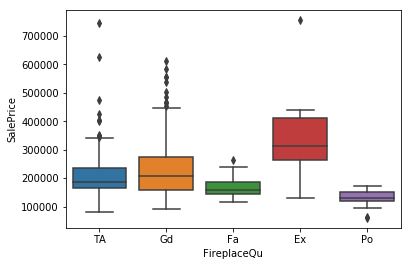

In [157]:
# See if FireplaceQu is material to SalePrice
sns.boxplot(data=home_data,x='FireplaceQu',y='SalePrice')

In [137]:
home_data[home_data['FireplaceQu'].isnull()]['Fireplaces'].unique()

array([0], dtype=int64)

As we can see FireplaceQu is missing when there is no garage. However, we also see that the SalePrice goes up a lot when the quality is 'Ex' or presumably 'Excellent'!

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 12, in zmq.backend.cython.checkrc._check_rc (zmq\backend\cython\message.c:4294)
    PyErr_CheckSignals()
KeyboardInterrupt


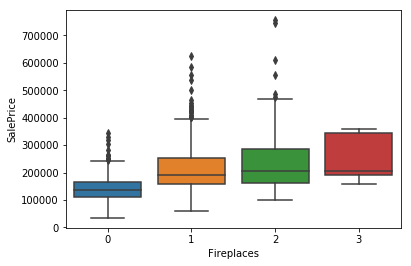

In [139]:
sns.boxplot(data=home_data,x='Fireplaces',y='SalePrice')

C:\Users\Arun\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


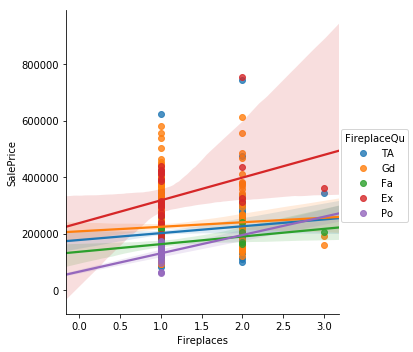

In [141]:
sns.lmplot(data=home_data,x='Fireplaces',y='SalePrice',hue='FireplaceQu')

As we can see, there is some benefit in including 'FireplaceQu'. But, we will remove it for now.

In [152]:
categorical_columns.remove('FireplaceQu')

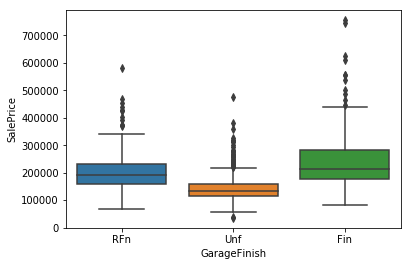

In [156]:
# Check SalePrice vs the various 'Garage' variables
#sns.boxplot(data=home_data,x='GarageType',y='SalePrice')   # --> Not much difference
#sns.boxplot(data=home_data,x='GarageQual',y='SalePrice')   # --> Minor difference
#sns.boxplot(data=home_data,x='GarageCond',y='SalePrice')   # --> Minor difference
#sns.boxplot(data=home_data,x='GarageFinish',y='SalePrice') # --> Significant difference


In [164]:
# Similarly check for 'Bsmt' variables
#sns.boxplot(data=home_data,x='BsmtQual',y='SalePrice') # --> Significant difference
#sns.boxplot(data=home_data,x='BsmtCond',y='SalePrice')  # --> Significant difference
#sns.boxplot(data=home_data,x='BsmtExposure',y='SalePrice') # --> Significant difference
#sns.boxplot(data=home_data,x='BsmtFinType1',y='SalePrice') # --> Minor difference
#sns.boxplot(data=home_data,x='BsmtFinType2',y='SalePrice') # --> Minor difference

For now, we will remove both 'Bsmt' and 'Garage' variables.

In [165]:
# Remove columns with high missing values
remove_categorical_columns = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2','GarageType','GarageQual','GarageCond','GarageFinish']
for x in remove_categorical_columns:
    categorical_columns.remove(x)


In [166]:
len(categorical_columns)

29

In [185]:
categorical_columns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [200]:
# Find out categories of the categorical columns
for col in categorical_columns:
    print(col + ' : ' + str(X[col].nunique()))

KeyError: 'MSZoning'

#### 3.10 Apply similar modifications to test data

In [214]:
test_null_numeric_columns=test_data[numeric_columns].columns[test_data[numeric_columns].isnull().any()]
test_data[test_null_numeric_columns].isnull().sum()

BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
GarageCars      1
GarageArea      1
dtype: int64

In [207]:
test_data = test_data.dropna()

In [209]:
#test_data[test_null_numeric_columns].isnull().sum()

### 4. Data deep-dive

### 5. Key Insights

### 6. Build models

#### 6.1 Pre-processing

In [263]:
# Create target object and call it y
y = home_data.SalePrice
# Create X
#features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
features = numeric_columns # Trying only numerical columns
X = X[features]

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

#### 6.2 Model 1: Decision Tree

In [264]:
# Specify Model
model = DecisionTreeRegressor(random_state=1)
# Fit Model
model.fit(train_X, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

### 7. Model validation

#### 7.1 Model predictions

In [265]:
# Make validation predictions and calculate mean absolute error
val_predictions = model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_mae))

Validation MAE when not specifying max_leaf_nodes: 24,752


### 8. Optimization

#### 8.1 Hyperparameter tuning

In [266]:
# Using best value for max_leaf_nodes
model = DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)
model.fit(train_X, train_y)
val_predictions = model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(val_mae))

Validation MAE for best value of max_leaf_nodes: 23,846


### 9. Model selection and finalization

#### 9.1 Model selection

In [295]:
# Define the model. Set random_state to 1
rf_model = RandomForestRegressor(random_state=1,n_estimators=100)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))

Validation MAE for Random Forest Model: 17,158


#### 9.2 Model finailization

In [289]:
# To improve accuracy, create a new Random Forest model which you will train on all training data
rf_model_on_full_data = RandomForestRegressor(random_state=1, n_estimators=100,max_depth=7)

# fit rf_model_on_full_data on all data from the training data
rf_model_on_full_data.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

#### 9.3 Make predictions

In [290]:
# create test_X which comes from test_data but includes only the columns you used for prediction.
# The list of columns is stored in a variable called features
test_X = test_data[features]

# make predictions which we will submit. 
test_preds = rf_model_on_full_data.predict(test_X)

#### 9.4 Post validation

#### 9.5 Finalize model

#### 9.6 Publish result/ Save output

In [291]:
output = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': test_preds})
output.to_csv('submission.csv', index=False)